<a href="https://colab.research.google.com/github/yoshihikom/thu_Details_of_Management_Information_BII_Lesson14/blob/main/%E7%B5%8C%E5%96%B6%E6%83%85%E5%A0%B1%E5%90%84%E8%AB%96B%E2%85%A1_%E7%AC%AC%EF%BC%91%EF%BC%94%E5%9B%9E_%E5%88%86%E6%95%A3%E5%88%86%E6%9E%90_(1)%E4%B8%80%E5%85%83%E9%85%8D%E7%BD%AE%E3%81%AE%E5%88%86%E6%95%A3%E5%88%86%E6%9E%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 経営情報各論BⅡ：14. 分散分析(1)

## (1)一元配置の分散分析

この内容は，<A HREF="http://whitewell.sakura.ne.jp/PythonProbStat/Python-statistics6.html" target="_blank">白井(2018)「確率統計学B講義資料」の「Pythonで統計学を学ぶ(6)」，<A HREF="http://shop.ohmsha.co.jp/shop/shopdetail.html?brandcode=000000001781&search=978-4-274-06710-5&sort=" target="_blank">山田、杉澤、村井(2008)「R」によるやさしい統計学</A>、および<A HREF="https://www.marsja.se/four-ways-to-conduct-one-way-anovas-using-python/" target="_blank">Erik Marsjaの記事</A>を参考にしています。


ここでは、「分散分析」のうち、「一元配置分散分析」をとりあげます。
分散分析は3つ以上の群の平均値を比較したり、ある条件の違いによって母平均が異なるかを検定します。

講義項目です:
* <A HREF="#RS06:nonpaired">（繰り返しのない）一元配置分散分析</A>
* <A HREF="#RS06:paired">繰り返しのある一元配置分散分析</A>
* <A HREF="#Functions">関数のまとめ</A>
* <A HREF="#Exercises">演習問題</A>


## 分散分析とは

**分散分析**(ANOVA, Analysis Of Variance)
とは、３つ以上の群の平均値差の検定や、条件(の組み合わせ)の違いによって母平均が異なるかどうかを検定する方法です
(注意:「分散」という名前に惑わされないように)
<P>
データにおいて変数がとる値は、以下の『要因』によるものと「誤差」によるものがあるとみなせます:

* **要因**: 母平均に違いをもたらす原因
* **水準**: ある要因の中に含まれる個々の条件


そして、<font class="important">
「データ全体のばらつき」は、『要因によるばらつき』と『誤差によるばらつき』の和</font>とみなせます。分散分析は、データ全体のばらつきを「平方和」として表し、それを要因ごとに分け、誤差に比べて大きな影響を与えている要因を探し出し、推測に利用する方法です。
<BR>
具体的には、ある要因の水準ごとに分けたデータ(群)について、それぞれの群の平均を求めます。そして全データに対し、その群の平均を引いた差の2乗を求めます。Pythonで書くと(「全データを表す」変数に行列データが入っているとします):
<BR>

```
import numpy as np
import pandas as pd
# A, B, C, Dは「一元配置の分散分析」の例からとった。1要因4水準
A = np.array([8.40,4.44,7.71,7.23,3.57,3.53,3.77,7.31])
B = np.array([6.79,5.74,5.02,6.71,8.57,8.49,7.80,5.29])
C = np.array([5.79,8.65,10.38,6.25,8.22,7.15,9.32,5.62])
D = np.array([7.30,9.20,7.71,8.14,7.14,11.35,6.77,7.97])

AllData = pd.DataFrame({'A':A, 'B':B, 'C':C, 'D':D})  # データフレームを作る:全データ
GroupAverage = AllData.mean()	# 水準ごとの平均のベクトル:群平均
# 水準ごとの平均のベクトルを行数だけ並べた行列を作る
GroupAverageMatrix =np.ones(AllData.shape)       # 群平均行列の形の生成
for i in range(AllData.shape[1]):                # 要素をいれていく
    GroupAverageMatrix[:,i] = AllData.mean().iloc[i]   # 水準ごとの平均

InGroup = np.array(AllData - GroupAverageMatrix)  # 各データと、その群内の平均との差

InGroupSquareSum = np.sum(InGroup**2)		# 　群内平方和

Divider = InGroupSquareSum /( ( len(AllData.index) -1.0)*len(AllData.columns)) # 分母
```

このように「それぞれのデータと群平均との差の2乗の和」が「群の中のデータのばらつき」を表し、これが(<font class="word">群内平方和</font>)と呼ばれるものです。そして、これを群内の自由度(「各群のデータ数-1」の和)で割ったものが、各データの「<font class="word">誤差によるばらつき</font>」を表しているとみなすことができます。
<P>
一方、「<font class="word">要因によるばらつき</font>」は、群間のばらつきで表されます。それは「全データの平均と各群の平均の差」の2乗の和を、群間の自由度(群の数-1、つまり水準数-1)で割った値と計算されます:
<BR>
```
# 全データの和の平均</font>
OverallMean = np.sum(AllData.mean())/len(AllData.columns)   # 全体平均
# 各群ごと「群平均-全平均」からなる行列
InterGroup =GroupAverageMatrix - np.ones(AllData.shape)*OverallMean  # 群間
InterGroupSquareSum = np.sum(InterGroup**2)  # 群間平方和

Dividend = InterGroupSquareSum / (len(AllData.columns) - 1.0) # 分子
```
群間平方和を群間の自由度で割った値（「分子」の値）が『<font class="word">要因によるばらつき</font>』です。これを「誤差によるばらつき」で割った値が<font class="important">F</font>であり、Fの値によって要因のばらつきの影響を推定するのが分散分析です(この計算方法が「分散」という名前がついている理由です。なお、Fは統計学者Fisherに由来します)。
<BR>
```
Dividend    # 分子
⇒ 9.21992812499999
Divider     # 分母
⇒ 2.890185267857143
F = Dividend / Divider      # F = 分子/分母
⇒ 3.190082043368756
```


## 一元配置の分散分析の例（講義で説明した例）

４種の飼料A,B,C,Dを各々子豚８頭に与え，１月後の体重増加を調べ，飼料の効果があるのかを一元配置の分散分析を行い検証する．

In [ ]:
import numpy as np
# A, B, C, Dは「対応のない一元配置分散分析」の例からとった。1要因4水準
A = np.array([8.40,4.44,7.71,7.23,3.57,3.53,3.77,7.31])
B = np.array([6.79,5.74,5.02,6.71,8.57,8.49,7.80,5.29])
C = np.array([5.79,8.65,10.38,6.25,8.22,7.15,9.32,5.62])
D = np.array([7.30,9.20,7.71,8.14,7.14,11.35,6.77,7.97])

In [ ]:
import pandas as pd

AllData = pd.DataFrame({'A':A, 'B':B, 'C':C, 'D':D})
AllData

,A,B,C,D
0,8.40,6.79,5.79,7.30
1,4.44,5.74,8.65,9.20
2,7.71,5.02,10.38,7.71
3,7.23,6.71,6.25,8.14
4,3.57,8.57,8.22,7.14
5,3.53,8.49,7.15,11.35
6,3.77,7.80,9.32,6.77
7,7.31,5.29,5.62,7.97


In [ ]:
AllData.mean()

A    5.74500
B    6.80125
C    7.67250
D    8.19750
dtype: float64

In [ ]:
GroupAverageMatrix =np.ones(AllData.shape)
for i in range(AllData.shape[1]):
    GroupAverageMatrix[:,i] = AllData.mean().iloc[i]

GroupAverageMatrix

array([[5.745  , 6.80125, 7.6725 , 8.1975 ],
       [5.745  , 6.80125, 7.6725 , 8.1975 ],
       [5.745  , 6.80125, 7.6725 , 8.1975 ],
       [5.745  , 6.80125, 7.6725 , 8.1975 ],
       [5.745  , 6.80125, 7.6725 , 8.1975 ],
       [5.745  , 6.80125, 7.6725 , 8.1975 ],
       [5.745  , 6.80125, 7.6725 , 8.1975 ],
       [5.745  , 6.80125, 7.6725 , 8.1975 ]])

In [ ]:
InGroup = np.array(AllData - GroupAverageMatrix)
InGroup

array([[ 2.655  , -0.01125, -1.8825 , -0.8975 ],
       [-1.305  , -1.06125,  0.9775 ,  1.0025 ],
       [ 1.965  , -1.78125,  2.7075 , -0.4875 ],
       [ 1.485  , -0.09125, -1.4225 , -0.0575 ],
       [-2.175  ,  1.76875,  0.5475 , -1.0575 ],
       [-2.215  ,  1.68875, -0.5225 ,  3.1525 ],
       [-1.975  ,  0.99875,  1.6475 , -1.4275 ],
       [ 1.565  , -1.51125, -2.0525 , -0.2275 ]])

In [ ]:
InGroupSquareSum = np.sum(InGroup**2)
InGroupSquareSum

80.9251875

In [ ]:
#len(AllData.columns)
OverallMean = np.sum(AllData.mean())/len(AllData.columns)
OverallMean

7.1040624999999995

In [ ]:
InterGroup =GroupAverageMatrix - np.ones(AllData.shape)*OverallMean
InterGroup

array([[-1.3590625, -0.3028125,  0.5684375,  1.0934375],
       [-1.3590625, -0.3028125,  0.5684375,  1.0934375],
       [-1.3590625, -0.3028125,  0.5684375,  1.0934375],
       [-1.3590625, -0.3028125,  0.5684375,  1.0934375],
       [-1.3590625, -0.3028125,  0.5684375,  1.0934375],
       [-1.3590625, -0.3028125,  0.5684375,  1.0934375],
       [-1.3590625, -0.3028125,  0.5684375,  1.0934375],
       [-1.3590625, -0.3028125,  0.5684375,  1.0934375]])

In [ ]:
InterGroupSquareSum = np.sum(InterGroup**2)
InterGroupSquareSum

27.659784375

In [ ]:
Dividend = InterGroupSquareSum / (len(AllData.columns) - 1.0)
Dividend

9.219928125000001

In [ ]:
Divider = InGroupSquareSum /( ( len(AllData.index) -1.0)*len(AllData.columns))
Divider

2.890185267857143

In [ ]:
F = Dividend / Divider
F

3.19008204336876


変数の値に影響を及ぼす要因が1個の場合<font class="word">一元配置法</font>、要因が2個の場合<font class="word">二元配置法</font>、
3個以上の場合は<font class="word">多元配置法</font>という。<BR>
また要因と水準の組み合わせごとに実験が繰り返されてデータがとられる場合を<font class="word">繰り返しのある二元配置法</font>などと呼ぶ。
<P>
一般に検定の結果として表示される<font class="word">分散分析表</font>の構成 (PythonではFとpの値のみ):

|要因 | 自由度(Df) |平方和(Sum Sq)|平均平方(Mean Sum Sq)|F値(F value)|P値|評価|
|:---|:---|:---|:---|:---|:---|:---|
|要因名|水準数-1|群間平方和|群間平方平均|F値|p値|<font color="green">印</font>(表の下に説明)|
|残差(Residuals)|水準数×(１群あたりのデータ数-1)|群内平方和|群内平方平均| 　| 　| 　|
|合計|データ数-1| 　|　 　| 　| 　| 　|

<font color="green">評価の印</font>: 星印は有意(***は0.1%、**は1%、*は5%水準)、.は10%(「有意傾向」という)を表す

<hr noshade="noshade" size="4">


In [ ]:
m=len(AllData.columns) - 1.0
n= ( len(AllData.index) -1.0)*len(AllData.columns)
print(m,n)

3.0 28.0


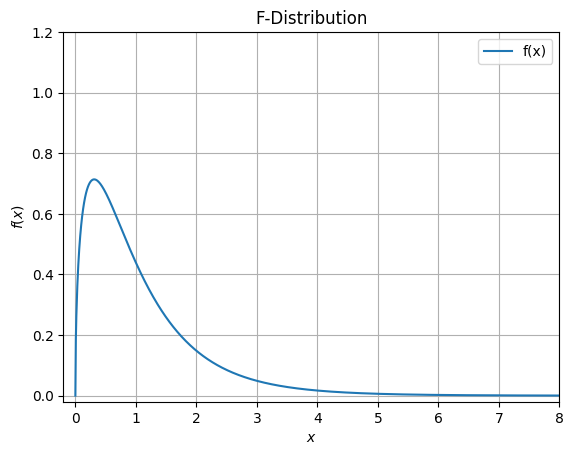

In [ ]:
from __future__ import division

%matplotlib inline
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

fig,ax = plt.subplots(1,1)
x = np.linspace(0,8, 1000)

ax.plot(x, stats.f.pdf(x, m,n), linestyle='-', label='f(x)')

plt.xlabel('$x$')
plt.ylabel(r'$f(x)$')
plt.title(r'F-Distribution')
plt.axis([-0.2,8,-0.02,1.2])
plt.legend()
plt.grid()

In [ ]:
stats.f.sf(F, m,n)

0.038891806895635574

飼料の効果の$p$値が0.05(有意水準5%)以下なので，棄却域に入っている．よって，帰無仮説は棄却された．飼料の効果があったことが（有意水準5%で）確かめられたことになる．

次に，`spipy` ライブラリを使って分散分析を行う．データはあらかじめCSVに入れておく．

In [ ]:
import pandas as pd
from scipy import stats
url = "oneway_anova_example1.csv"
data = pd.read_csv(url)
data

,Unnamed: 0,weight,feed
0,1,8.40,A
1,2,4.44,A
2,3,7.71,A
3,4,7.23,A
4,5,3.57,A
5,6,3.53,A
6,7,3.77,A
7,8,7.31,A
8,9,6.79,B
9,10,5.74,B


In [ ]:
# CSVデータは縦持ちなので、横持ちのデータに変換する
ctrl = data['weight'][data.feed == 'A']
grps = pd.unique(data.feed.values)
d_data = {grp:data['weight'][data.feed == grp] for grp in grps}
d_data

{'A': 0    8.40
 1    4.44
 2    7.71
 3    7.23
 4    3.57
 5    3.53
 6    3.77
 7    7.31
 Name: weight, dtype: float64,
 'B': 8     6.79
 9     5.74
 10    5.02
 11    6.71
 12    8.57
 13    8.49
 14    7.80
 15    5.29
 Name: weight, dtype: float64,
 'C': 16     5.79
 17     8.65
 18    10.38
 19     6.25
 20     8.22
 21     7.15
 22     9.32
 23     5.62
 Name: weight, dtype: float64,
 'D': 24     7.30
 25     9.20
 26     7.71
 27     8.14
 28     7.14
 29    11.35
 30     6.77
 31     7.97
 Name: weight, dtype: float64}

In [ ]:
# stats.f_onewayを実行して結果を出力する
result = stats.f_oneway(d_data['A'], d_data['B'], d_data['C'], d_data['D'])
print(result)

F_onewayResult(statistic=3.190082043368759, pvalue=0.03889180689563567)


`statistic` は、$F$値で、`pvalue` は $p$値です。

有意水準5％とすると、0.0389 <= 0.05 なので、集団間の平均値に差異があることが言えそうです。

## <A NAME="RS06:nonpaired">（繰り返しのない）一元配置分散分析</A>

例題：以下の表は『教え方』ごとにみた統計学テストの成績である。この表から、４通りの教え方(A,B,C,D)によって統計学テストの母平均に差があるだろうか？
<table border=4 width=400 align=center>
  <tr bgcolor="#cccccc">
    <th width=25%>A</th>
    <th width=25%>B</th>
    <th width=25%>C</th>
    <th width=25%>D</th>
  </tr>
  <tr>
	<td align="right" cellpadding=10>15 </td>
	<td align="right" cellpadding=10> 13</td>
	<td align="right" cellpadding=10>10 </td>
	<td align="right" cellpadding=10> 10</td>
  </tr>
  <tr>
	<td align="right" cellpadding=10> 9</td>
	<td align="right" cellpadding=10>8 </td>
	<td align="right" cellpadding=10>6 </td>
	<td align="right" cellpadding=10> 7</td>
  </tr>  <tr>
	<td align="right" cellpadding=10>18 </td>
	<td align="right" cellpadding=10> 8</td>
	<td align="right" cellpadding=10> 11</td>
	<td align="right" cellpadding=10> 3</td>
  </tr>  <tr>
	<td align="right" cellpadding=10> 14</td>
	<td align="right" cellpadding=10> 12</td>
	<td align="right" cellpadding=10> 7</td>
	<td align="right" cellpadding=10> 5</td>
  </tr>  <tr>
	<td align="right" cellpadding=10>18 </td>
	<td align="right" cellpadding=10> 7</td>
	<td align="right" cellpadding=10> 12</td>
	<td align="right" cellpadding=10>7 </td>
  </tr>
</table>
<BR>
この標本が母平均の等しい4群から抽出される可能性が高いかどうかを検討するために分散分析を行う。ここで『教え方』が<font class="word">要因</font>、A, B, C, Dの4つがその<font class="word">水準</font>となる.
<P>
Pythonを用いた計算方法の紹介
<OL class="other">
 <LI> 帰無仮説と対立仮説の設定<BR>
　 	・帰無仮説 H<sub>0</sub>：4群の母平均は等しい<BR>
　 	・対立仮説 H<sub>1</sub>：4群の母平均は等しくない<BR>
注意: 4群のうち1つだけ母平均が異なるような場合でも対立仮説は成立
 <LI>検定統計量の選択 ---
次のFを検定統計量とする: <IMG  class="exp" SRC="http://whitewell.sakura.ne.jp/PythonProbStat/Figs/F.png"  width="35%" hspace="1" align="center" />

これは帰無仮説（すべての群の母平均が等しいとき）のもとで、F分布に従う

<font class="rule">F分布の自由度は２種類：分子と分母の自由度</font><BR>
F分布の描画: st.f.pdf(x,分子の自由度,分母の自由度) 関数を使用<BR>
```
plt.plot(x,st.f.pdf(x, 3, 16))
```

<LI> 有意水準$\alpha$の決定: ここでは有意水準は5%、つまり$\alpha=0.05$とする
<BR>
F分布のグラフから明らかなように、F分布は正値を取る⇒　<font class="rule">分散分析は常に片側検定</font>
 <LI>検定統計量の実現値を求める:  st.f_oneway関数
</OL>

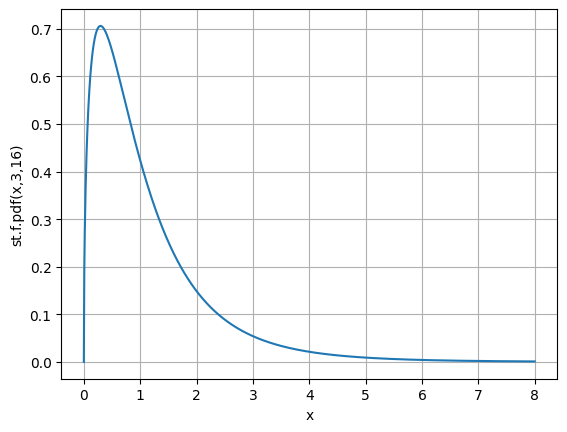

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
x=np.linspace(0,8,1000)
plt.plot(x,st.f.pdf(x,3,16))
plt.xlabel('x')
plt.ylabel('st.f.pdf(x,3,16)')
plt.grid()

In [ ]:
help(st.f_oneway)

Help on function f_oneway in module scipy.stats._stats_py:

f_oneway(*samples, axis=0)
    Perform one-way ANOVA.
    
    The one-way ANOVA tests the null hypothesis that two or more groups have
    the same population mean.  The test is applied to samples from two or
    more groups, possibly with differing sizes.
    
    Parameters
    ----------
    sample1, sample2, ... : array_like
        The sample measurements for each group.  There must be at least
        two arguments.  If the arrays are multidimensional, then all the
        dimensions of the array must be the same except for `axis`.
    axis : int, optional
        Axis of the input arrays along which the test is applied.
        Default is 0.
    
    Returns
    -------
    statistic : float
        The computed F statistic of the test.
    pvalue : float
        The associated p-value from the F distribution.
    
    Warns
    -----
    `~scipy.stats.ConstantInputWarning`
        Raised if all values within each of t

---
Pythonを用いた計算:

In [ ]:
import numpy as np
# 4つの指導法に違いがあるか?
A = np.array([15,9,18,14,18])
B = np.array([13,8,8,12,7])
C = np.array([10,6,11,7,12])
D = np.array([10,7,3,5,7])

In [ ]:
f, p = st.f_oneway(A,B,C,D)
print("F=%f, p-value = %f"%(f,p))

F=7.111111, p-value = 0.002988


F値は7.11、p値が0.003であるから、帰無仮説が棄却される。検定の結果、つまりA,B,C,Dの間に有意な平均値差が見られたことが導ける。

注意: 実際には分散分析を適用するには、データが独立で、それぞれ正規分布に従うものであり、分散はみな等しい(分散の等質性）という条件がある。分散の等質性の検定にはBartlett検定を用いる。


In [ ]:
st.bartlett(A,B,C,D) # Bartlett検定

BartlettResult(statistic=0.704094908747911, pvalue=0.8722403650937011)

---
## 多重比較(Tukeyの方法)

一元配置分散分析の結果「帰無仮説が棄却」されても、これだけでは「群の母平均が等しくない」ことしかわからない。
<BR>
具体的に「どの群とどの群の間に差があるか」を知りたいことが多い。それには<font class="word">多重比較</font>を行う。ここでは<font class="word">Tukey（テューキー）の方法</font>を紹介する。

仮定: 各群のデータ数（サンプルサイズ)nが等しく、各群の母分散も等しい(分散の等質性)<BR>
検定統計量q: <IMG  class="exp" SRC="http://whitewell.sakura.ne.jp/PythonProbStat/Figs/qValue.png"  width="35%" hspace="1" align="center" />
<BR>
Pythonでは次のようにstatsmodels.stats.multicompモジュールの pairwise_tukeyhsd (Tukey's <Q>Honest Significant Difference</Q>)関数を用いれば、いろいろな指導方法による平均値差の多重比較が可能となる

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
help(pairwise_tukeyhsd)

Help on function pairwise_tukeyhsd in module statsmodels.stats.multicomp:

pairwise_tukeyhsd(endog, groups, alpha=0.05)
    Calculate all pairwise comparisons with TukeyHSD confidence intervals
    
    Parameters
    ----------
    endog : ndarray, float, 1d
        response variable
    groups : ndarray, 1d
        array with groups, can be string or integers
    alpha : float
        significance level for the test
    
    Returns
    -------
    results : TukeyHSDResults instance
        A results class containing relevant data and some post-hoc
        calculations, including adjusted p-value
    
    Notes
    -----
    This is just a wrapper around tukeyhsd method of MultiComparison
    
    See Also
    --------
    MultiComparison
    tukeyhsd
    statsmodels.sandbox.stats.multicomp.TukeyHSDResults



In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import numpy as np
# 4つの指導法に違いがあるか?
A = np.array([15,9,18,14,18])
B = np.array([13,8,8,12,7])
C = np.array([10,6,11,7,12])
D = np.array([10,7,3,5,7])

data_arr = np.hstack( (A,B,C,D) ) # すべてのデータを結合
# array([15,  9, 18, 14, 18, 13,  8,  8, 12,  7, 10,  6, 11,  7, 12, 10,  7,  3,  5,  7])
ind_arr = np.repeat(list('ABCD'),len(A))   # 名称をリスト
# array(['A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'C', 'C', 'C', 'C', 'C', 'D', 'D', 'D', 'D', 'D'])

print(pairwise_tukeyhsd(data_arr,ind_arr))   # 結果を出力する

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     A      B     -5.2 0.0562 -10.5141  0.1141  False
     A      C     -5.6 0.0371 -10.9141 -0.2859   True
     A      D     -8.4 0.0018 -13.7141 -3.0859   True
     B      C     -0.4 0.9963  -5.7141  4.9141  False
     B      D     -3.2 0.3447  -8.5141  2.1141  False
     C      D     -2.8 0.4561  -8.1141  2.5141  False
-----------------------------------------------------


出力された表においてはp値が0.05以下のものに、reject列で True と記入がある。これに該当するのはAとCの間,およびAとDの間であり、これらには5%水準で有意差があることがわかった。

In [ ]:
# 参考: 関数にしてみた
def tukey_hsd( lst, ind, n ):
    from statsmodels.stats.multicomp import pairwise_tukeyhsd
    import numpy as np
    data_arr = np.hstack( lst )
    ind_arr = np.repeat(ind, n)
    print(pairwise_tukeyhsd(data_arr,ind_arr))

tukey_hsd( (A,B,C,D), list('ABCD') , 5) # 第1引数:データをタプルで, 第2引数:名称のリスト, 第3引数: データの個数

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     A      B     -5.2 0.0562 -10.5141  0.1141  False
     A      C     -5.6 0.0371 -10.9141 -0.2859   True
     A      D     -8.4 0.0018 -13.7141 -3.0859   True
     B      C     -0.4 0.9963  -5.7141  4.9141  False
     B      D     -3.2 0.3447  -8.5141  2.1141  False
     C      D     -2.8 0.4561  -8.1141  2.5141  False
-----------------------------------------------------


In [ ]:
# 別バージョン：個数がそれぞれ違う場合. 次を参考にした: http://qiita.com/keroplant/items/bb03375c55ca4b2f5943
# 関数名も変更
A = [100, 96, 80, 92, 101, 99, 89, 93]
B = [83, 77, 86, 71, 70, 98, 80, 75, 74]
C = [90, 91, 92, 89, 88, 90, 91]

def tukey_hsd_2( ind, *args ):
    from statsmodels.stats.multicomp import pairwise_tukeyhsd
    import numpy as np
    data_arr = np.hstack( args )
    ind_arr = np.array([])
    for x in range(len(args)):
      ind_arr = np.append(ind_arr, np.repeat(ind[x], len(args[x])))
    print(pairwise_tukeyhsd(data_arr,ind_arr))

tukey_hsd_2(list('ABC') , A,B,C) # 第1引数:名称のリスト, 第2引数以降: データ

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     A      B -14.4167 0.0007  -22.725 -6.1083   True
     A      C  -3.6071 0.5683 -12.4565  5.2422  False
     B      C  10.8095 0.0125   2.1927 19.4264   True
-----------------------------------------------------


---
## <A NAME="RS06:paired">繰り返しのある一元配置分散分析</A>

一元配置分散分析(繰り返しあり)では、同じ被験者が複数の条件を経験する(<font class="word">被験者内計画のデータ</font>)というような対応があるデータを対象とする
<BR>

[参考: 繰り返しのあるなしの違い]

データに『繰り返しがある（反復、対応がある、ともいう）』ということは、それだけ情報が多い(データだから、それを用いた検定が可能になります。「繰り返しのあるt検定」について述べ、そこで取り上げた例題では結論は変わらなかったものの、対応のある検定の方がp値が小さい、ということを見ました。ここで取り上げる例題でも同じようなことがわかります。以下ではデータに「繰り返しがない」ものとして検定した結果を載せます。

```
import numpy as np
import scipy.stats as st
Algebra = np.array([7,8,9,5,6])
Calculus = np.array([5,4,7,1,3])
Statistics = np.array([8,6,7,2,5])  # 好き嫌い度
print( st.f_oneway(Algebra, Calculus, Statistics) )
⇒ F_onewayResult(statistic=2.6406250000000004, pvalue=0.11210798800331405)
```

『繰り返しのない』データとしての検定は、F値が2.64で、p値は0.112なので、有意水準0.05よりも大きいため、
帰無仮説は棄却されない。<P>
この結果と、本文で述べる「繰り返しがある」場合の結果とを比べてみてください。

In [ ]:
import numpy as np
import scipy.stats as st
Algebra = np.array([7,8,9,5,6])
Calculus = np.array([5,4,7,1,3])
Statistics = np.array([8,6,7,2,5])  # 好き嫌い度
print( st.f_oneway(Algebra, Calculus, Statistics) )

F_onewayResult(statistic=2.6406250000000004, pvalue=0.11210798800331405)


例題: 以下の表は5名の学生に、線形代数、微分積分、確率統計に対する好意度の評定データである。
これら3つの科目に対する好意度に差があるだろうか？（念のため：これは１要因３水準)
<table border=4 width=600 align=center>
  <tr bgcolor="#cccccc">
    <th width=25%>学生</th>
    <th width=25%>線形代数</th>
    <th width=25%>微分積分</th>
    <th width=25%>確率統計</th>
  </tr>
  <tr>
	<td align="center" cellpadding=10>田中 </td>
	<td align="center" cellpadding=10> 7</td>
	<td align="center" cellpadding=10>5 </td>
	<td align="center" cellpadding=10> 8</td>
  </tr>
  <tr>
	<td align="center" cellpadding=10> 岸</td>
	<td align="center" cellpadding=10>8 </td>
	<td align="center" cellpadding=10>4 </td>
	<td align="center" cellpadding=10>6</td>
  </tr>  <tr>
	<td align="center" cellpadding=10>大引</td>
	<td align="center" cellpadding=10> 9</td>
	<td align="center" cellpadding=10>7</td>
	<td align="center" cellpadding=10>7</td>
  </tr>  <tr>
	<td align="center" cellpadding=10> 吉川</td>
	<td align="center" cellpadding=10> 5</td>
	<td align="center" cellpadding=10> 1</td>
	<td align="center" cellpadding=10> 2</td>
  </tr>  <tr>
	<td align="center" cellpadding=10>荻野</td>
	<td align="center" cellpadding=10> 6</td>
	<td align="center" cellpadding=10> 3</td>
	<td align="center" cellpadding=10>5 </td>
  </tr>
</table>

Pythonを用いた計算方法の紹介
<OL class="other">
 <LI> 帰無仮説と対立仮説の設定<UL>
　 <LI>帰無仮説 H<sub>0</sub>：3科目の好意度の母平均は等しい
　 <LI>対立仮説 H<sub>1</sub>：3科目の好意度の母平均は等しくない
</UL>
 <LI>検定統計量の選択 ---
次のFを検定統計量とする: <IMG  class="exp" SRC="http://whitewell.sakura.ne.jp/PythonProbStat/Figs/F.png"  width="35%" hspace="1" align="center" />
<BR>
これは帰無仮説（すべての群の母平均が等しいとき）のもとで、F分布に従う
<LI> 有意水準$\alpha$の決定: ここでは有意水準は5%、つまり$\alpha=0.05$とする
<BR>
F分布のグラフから明らかなように、F分布は正値を取る⇒　<font class="rule">分散分析は常に片側検定</font>
 <LI>検定統計量の実現値を求める: Pythonでは、ややマイナーな pyvttbl モジュールを用いる

```
Algebra=[7,8,9,5,6] ; Calculus = [5,4,7,1,3] ; Statistics=[8,6,7,2,5]
Students=list(range(5))    # ['Tanaka','Kisi','Obiki','Yosikawa','Ogino']
Favorness = np.array(Algebra+Calculus+Statistics)  # 好意度をまとめrる
Condition = np.repeat(['algebra','calculus','statistics'],len(Algebra)) # Favornessに合わせた科目のリスト
Subjects = np.array(Students+Students+Students)  # Favornessに合わせた人のリスト
df = pt.DataFrame({'Favorness':Favorness,'Condition':Condition,'Subjects':Subjects}) # データフレームを作る
aov=df.anova('Favorness',sub='Subjects',wfactors=['Condition'])  # 対応のある１要因分散分析
print(aov)
```
この結果いろいろな表示がでるが、注目点だけ示す:

```
Favorness ~ Condition  #  Favorness(好意度)をCondition(条件、この場合は科目)から分析する

TESTS OF WITHIN SUBJECTS EFFECTS   # 「人」の対応ありのもとでの検定

# 以下はいろいろな検定方法で試されている。Sig の項がp値であり、0.002と小さい値であり5%基準で有意な差があることが示されている。

Measure: Favorness
     Source                             Type III    eps     df       MS       F      Sig.    et2_G   Obs.    SE     95% CI   lambda   Obs.  
                                           SS                                                                                         Power
===========================================================================================================================================
Condition          Sphericity Assumed     22.533       -       2   11.267   14.696   0.002   0.440      5   0.461    0.903   18.370   0.890

# 科目ごとの平均と標準偏差。これでみると線形代数(algebra)と微分積分(calculus)の間に差があるようにみえる
TABLES OF ESTIMATED MARGINAL MEANS

Estimated Marginal Means for Condition
Condition    Mean    Std. Error   95% Lower Bound   95% Upper Bound
===================================================================
algebra          7        0.707             5.614             8.386
calculus         4            1             2.040             5.960
statistics   5.600        1.030             3.582             7.618
```
  <LI>帰無仮説の棄却か採択かの決定: 結果の出力のSig列において、p値が 0.002 と得られているので、5%の有意水準で、
科目間に有意な差があることが認められた。

</OL>

[参考: 『人』がなぜ必要？]
 まず『人』を含めない場合は先に見たように p値は 0.112となり、科目の効果だけでは好意度の平均に有意な差が認められません。
そもそもこのデータにおいて『対応がある』としたのは、同じ人に対しそれぞれの科目の好意度のデータを集めたので、『対応関係がある』からです。
言い換えれば、「好意度」データを説明する要因として『科目』と『人』があり、『人』を考慮することでデータに「対応がある」と認められたのです。
</div>

In [ ]:
# データの準備：DataFrameを作る
import statsmodels.tsa.api as sm
from statsmodels.formula.api import ols
import pandas as pd

Algebra=[7,8,9,5,6] ; Calculus = [5,4,7,1,3] ; Statistics=[8,6,7,2,5]
Students=list(range(5))    # ['Tanaka','Kisi','Obiki','Yosikawa','Ogino']
Favorness = np.array(Algebra+Calculus+Statistics)
Condition = np.repeat(['algebra','calculus','statistics'],len(Algebra))
Subjects = np.array(Students+Students+Students)
df = pd.DataFrame({'Favorness':Favorness,'Condition':Condition,'Subjects':Subjects})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Favorness  15 non-null     int64 
 1   Condition  15 non-null     object
 2   Subjects   15 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 488.0+ bytes


In [ ]:
df[:5]

,Favorness,Condition,Subjects
0,7,algebra,0
1,8,algebra,1
2,9,algebra,2
3,5,algebra,3
4,6,algebra,4


In [ ]:
# statsmodels.statsのanova.AnovaRMを用いる、インスタンスを作ってfit()する
import statsmodels.stats.anova as anova
aov=anova.AnovaRM(df, 'Favorness','Subjects',['Condition'])
result=aov.fit()

In [ ]:
print(result)
# 有意水準は5%、つまり0.05とする

                Anova
          F Value Num DF Den DF Pr > F
--------------------------------------
Condition 14.6957 2.0000 8.0000 0.0021



In [ ]:
# 5%で有意差があるので、多重比較する
tukey_hsd_2(list('ACS') , Algebra,Calculus,Statistics)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     A      C     -3.0 0.0949 -6.4853 0.4853  False
     A      S     -1.4 0.5485 -4.8853 2.0853  False
     C      S      1.6 0.4619 -1.8853 5.0853  False
---------------------------------------------------


## <A NAME="Functions">関数のまとめ</A>
注:  scipy.statsをst、statsmodels.stats.anovaをanovaと略記する

<table border=2 width=800 align=left>
  <tr bgcolor="#cccccc">
    <th align="left" width=20%>目的 </th>
    <th align="left" width=40%>関数名とモジュール</th>
    <th align="left" width=40%>使い方</th>
  </tr>
  <tr>
	<td align="left" cellpadding=10>一元配置分散分析(対応なし)</td>
	<td align="left" cellpadding=10>st.f_oneway(配列$_1$,$\ldots$,配列$_n$)</td>
	<td align="left" cellpadding=10> st.f_oneway(Algebra,Caluculus,Statistics) ⇒ F値とp値</td>
  </tr>
      <tr>
	<td align="left" cellpadding=10>一元配置分散分析(対応あり)</td>
	<td align="left" cellpadding=10>anova.AnovaRM(データフレーム,依存変数名,人名, その他の属性のリスト]).fit()</td>
	<td align="left" cellpadding=10>anova.AnovaRM(df, 'Favorness','Subjects',['Condition'])).fit()</td>
  </tr>
      <tr>
	<td align="left" cellpadding=10>テューキーの多重分析</td>
	<td align="left" cellpadding=10>from statsmodels.stats.multicomp import pairwise_tukeyhsd</td>
	<td align="left" cellpadding=10></td>
  </tr>
  <tr>
	<td align="left" cellpadding=10>（続き)</td>
	<td align="left" cellpadding=10>pairwise_tukeyhsd(データをタプルで, 名称のリスト)もしくは自作関数tukey_hsd</td>
	<td align="left" cellpadding=10>pairwise_tukeyhsd(data_arr,ind_arr)</td>
  </tr>
<tr>
    <td align="left" cellpadding=10>分散の等質性の検定</td>
    <td>st.bartlett(データ$_1$,$\ldots$)</td>
    <td>st.bartlett(A,B,C)</td>
    </tr>
    </table>


## <A NAME="Exercises">演習問題</A>

#### 演習問題１
ある大学の4学部から8名ずつの学生を無作為抽出して得られた結果が以下である。学部間でテストの母平均に差があるかどうか、
有意水準5%で分散分析を行え。

In [ ]:
import numpy as np
Hougakubu = np.array([75, 61, 68, 58, 66, 55, 65, 63])
Bungakubu = np.array([62, 60, 66, 63, 55, 53, 59, 63])
Rigakubu = np.array([65, 60, 78, 52, 59, 66, 73, 64])
Kougakubu = np.array([52, 59, 44, 67, 47, 53, 58, 49])

#### 演習問題２
<A HREF="shidouhou.csv" target="_blank">shidouhou.csv</A>はCSV形式のファイルであり、20人の学生に対し、名前、性別、数学と統計の好き嫌い、心理学テスト、統計テスト１、統計テスト２のそれぞれの成績、そして指導方法の種別のデータが収められている。
このデータを読み込み、統計テスト1の成績が男女の違いで差があるかどうか、また統計の好き嫌いで差があるかどうかをそれぞれ検定せよ。

[参考: csvファイルを読み込む (再掲)</a>]

区切り記号がコンマのcsvファイルを読み込み、その内容をデータフレームとして取り込むには、pandasモジュールのread_csv関数を用いる。

もっとも中にはちゃんと読み込めないこともあるので、値を確認すること。そして読み込めない場合は、区切り記号を適切なものにセットしたりすることも考えよう。

日本語を含むデータの文字コードは、shift_jisだが、CSVファイル内に拡張文字に該当する文字を使用していると、shift_jisでは読み込めない。
拡張文字が含まれている場合は、encoding='cp932'を指定する必要がある。

#### 演習問題３
下は小学校１年生から６年生まで、各学年から５人ずつ無作為抽出し、50メートル走のタイムを計測したデータである。学年による違いがあるか、検討せよ(出典: 長畑(2009)『Rで学ぶ統計学』共立出版)


In [ ]:
import numpy as np
Grade1 = np.array([11.3, 12.4, 15.5, 13.6, 12.4])
Grade2 = np.array([12.3, 13.4, 11.5, 11.6, 10.8])
Grade3 = np.array([9.2, 10.4, 8.6, 9.8, 10.7])
Grade4 = np.array([9.5, 8.4, 9.8, 10.4, 7.8])
Grade5 = np.array([8.4, 7.5, 8.6, 7.9, 8.3])
Grade6 = np.array([7.8, 8.5, 7.6, 7.2, 7.5])

#### 演習問題４

下は3種類の1500ccの乗用車を繰り返し4回走行させ、その1リットルあたりの走行距離(燃費)を計測したものである。
車種による違いがあるか、分散分析せよ。(出典: 長畑(2009)『Rで学ぶ統計学』共立出版)

In [ ]:
import numpy as np
A = np.array([8.0, 9.0,  7.0,   6.0])
B  = np.array([12.0, 11.0, 13.0, 12.0])
C  = np.array([ 9.0, 10.0,  9.0,  8.0])